In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize': (14, 7)})

### Смотрим датасет

In [3]:
data = pd.read_csv('survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
data.shape

(309, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
pd.isnull(data).sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### Изменяем значения, применяем LabelEncoder

In [7]:
le = LabelEncoder()
data['LUNG_CANCER'] = le.fit_transform(data['LUNG_CANCER'])
data['GENDER'] = le.fit_transform(data['GENDER'])

columns = data.columns[2:-1].tolist()
f = {1: 0, 2: 1}

for c in columns:
    data = data.replace({c: f})
    
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


### Смотрим статистику, строим графики

In [8]:
data.groupby(['LUNG_CANCER'])['AGE'].agg([np.mean, np.median, np.std, np.min, np.max])

,mean,median,std,amin,amax
LUNG_CANCER,,,,,
0,60.743590,61.0,9.629226,21,87
1,62.951852,62.5,7.966560,38,81


In [9]:
# Женщины
data[data['GENDER'] == 0]['LUNG_CANCER'].value_counts()

1    125
0     22
Name: LUNG_CANCER, dtype: int64

In [10]:
# Мужчины
data[data['GENDER'] == 1]['LUNG_CANCER'].value_counts()

1    145
0     17
Name: LUNG_CANCER, dtype: int64

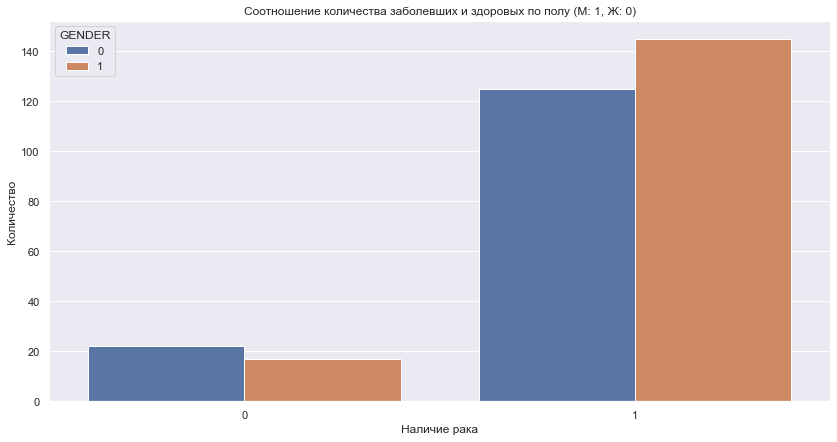

In [11]:
ax = sns.countplot(x='LUNG_CANCER', hue='GENDER', data=data)
ax.set_title('Соотношение количества заболевших и здоровых по полу (М: 1, Ж: 0)')
ax.set_xlabel('Наличие рака')
ax.set_ylabel('Количество');

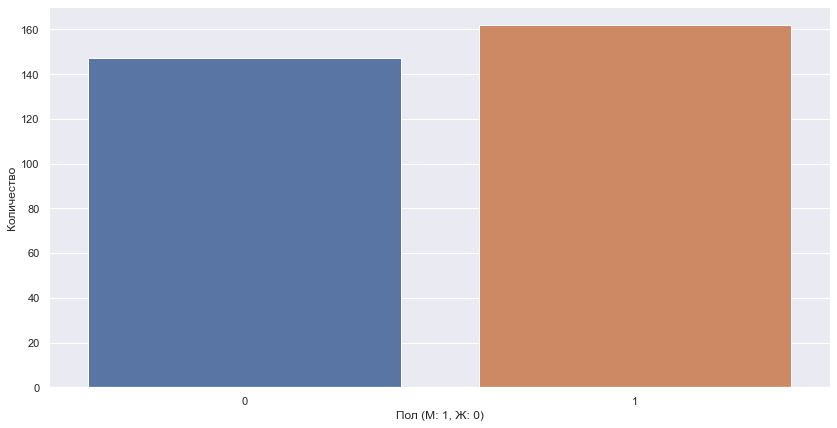

In [12]:
ax = sns.countplot(x='GENDER', data=data)
ax.set_xlabel('Пол (М: 1, Ж: 0)')
ax.set_ylabel('Количество');

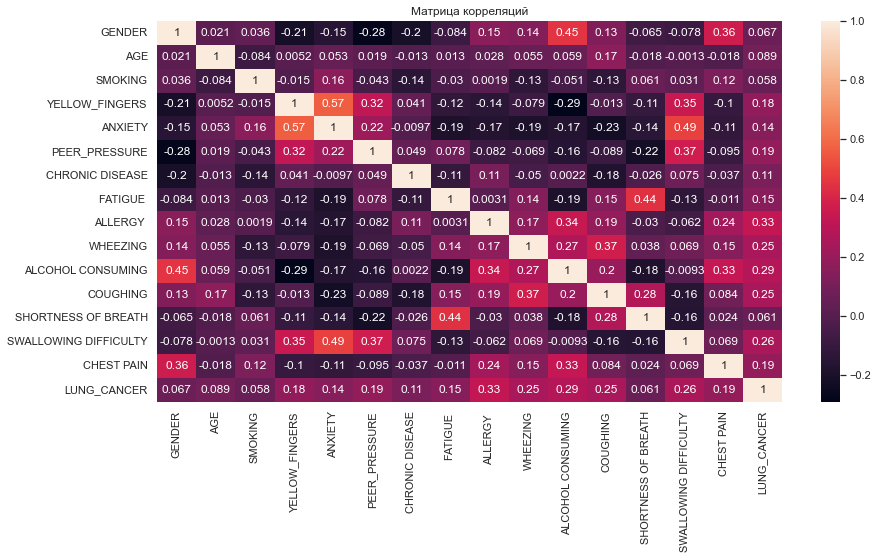

In [13]:
ax = sns.heatmap(data.corr(), annot=True)
ax.set_title('Матрица корреляций');

### Нормализация и разбиение на обучающую и тестовую выборки

In [14]:
x = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

In [15]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [16]:
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0.952579,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475
1,0.952579,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475
2,-1.049781,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475
3,0.952579,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475
4,-1.049781,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=41)

### Обучение моделей, предсказания, проверка качества

#### LogisticRegression

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)
preds = model.predict(x_test)

In [19]:
r2_score(y_test, preds)

-0.130434782608696

In [20]:
print(f'accuracy: {round(accuracy_score(y_test, preds), 2)}')

accuracy: 0.88


In [21]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.93      0.94      0.94        69

    accuracy                           0.88        78
   macro avg       0.71      0.69      0.70        78
weighted avg       0.88      0.88      0.88        78



#### RandomForestClassifier

In [22]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
preds = model.predict(x_test)

In [23]:
r2_score(y_test, preds)

0.24637681159420266

In [24]:
print(f'accuracy: {round(accuracy_score(y_test, preds), 2)}')

accuracy: 0.92


In [25]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.94      0.97      0.96        69

    accuracy                           0.92        78
   macro avg       0.83      0.76      0.79        78
weighted avg       0.92      0.92      0.92        78



Как мы видим, RandomForestClassifier показывает более хорошие результаты.